# Exploratory Data Analysis
This data analysis aims to provide a comprehensive assessment of stroke, utilizing a health dataset containing various demographic and health information. The analysis seeks to understand the relationships between patients' likelihood of having a stroke and other features, identify factors influencing stroke risk, and propose preventative measures based on this information. 

The dataset includes unique identifiers for each patient along with various demographic and health features. Among the features are gender, age, history of hypertension and hear disease, marital status, occupation, residence type, average glucose level in the blood, body mass index (BMI), smoking status, and whether the patient has had a stroke. 

### Data Explanation
The data contains 12 features:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood (Normally should be 70-140 mg/dl)
- bmi: body mass index (Normally should be 18-25)
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
- This dataset provides crucial information for determining patients' risk of stroke and understanding factors related to stroke. During data analysis, it will be particularly important to evaluate the relationships between experiencing a stroke and other features, identifying factors that could influence stroke risk.

In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns
from collections import Counter

In [88]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [89]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [90]:
df.tail(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [91]:
df.dtypes # object types are categorical

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [92]:
df.shape

(5110, 12)

In [93]:
df.describe().T # transposing rows and columns

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [94]:
# correcting data, 
data = df.copy()
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x == "Yes" else 0) # yes - 1, no - 0
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Female" else 0) # female - 1, male - 0 
data.rename(columns={'Residence_type': 'residence_type'}, inplace=True) # convert title to lowercase

# dropping unecessary feature id
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### Unique Value Analysis

In [95]:
categorical_name = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "residence_type", "smoking_status", "stroke"]
numerical_name = ["age", "avg_glucose_level", "bmi"]

In [96]:
# prints number of unique values for each attribute and if it is a categorical attribute, then it shows the distribution of 1s to 0s
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))
    if i in categorical_name:
        print("{}".format(data[i].unique()))
        print("{}".format(data[i].value_counts()))
    print("\n")

gender -- 2
[0 1]
gender
1    2994
0    2116
Name: count, dtype: int64


age -- 104


hypertension -- 2
[0 1]
hypertension
0    4612
1     498
Name: count, dtype: int64


heart_disease -- 2
[1 0]
heart_disease
0    4834
1     276
Name: count, dtype: int64


ever_married -- 2
[1 0]
ever_married
1    3353
0    1757
Name: count, dtype: int64


work_type -- 5
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


residence_type -- 2
['Urban' 'Rural']
residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


avg_glucose_level -- 3979


bmi -- 418


smoking_status -- 4
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


stroke -- 2
[1 0]
stroke
0    4861
1     249
Name: count, dtype: i

<Axes: ylabel='stroke'>

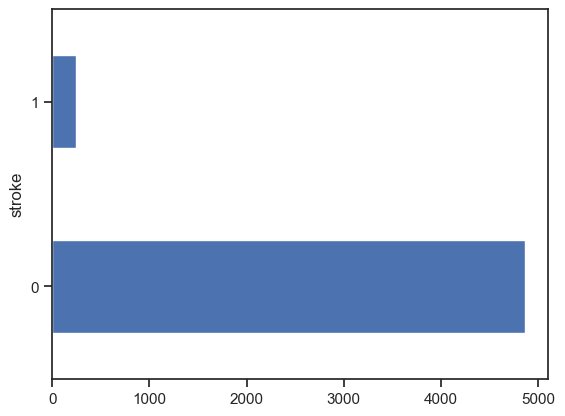

In [97]:
data["stroke"].value_counts().plot.barh()

/var/folders/3k/3cs8h_l95637pl99d15685lc0000gn/T/ipykernel_71031/2442658377.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='stroke'>

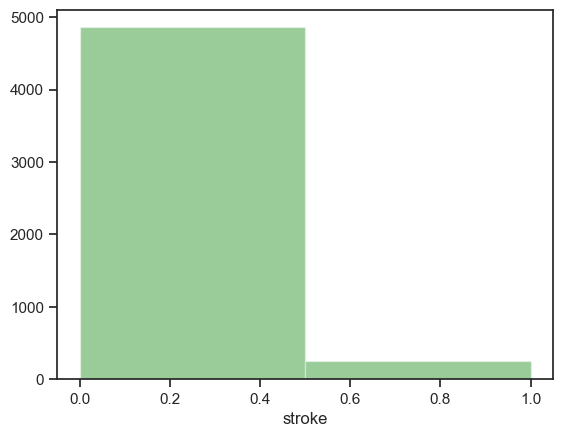

In [98]:
sns.distplot(data.stroke, bins = 2, kde = False, color = "green")

/var/folders/3k/3cs8h_l95637pl99d15685lc0000gn/T/ipykernel_71031/1505346333.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='stroke', ylabel='Density'>

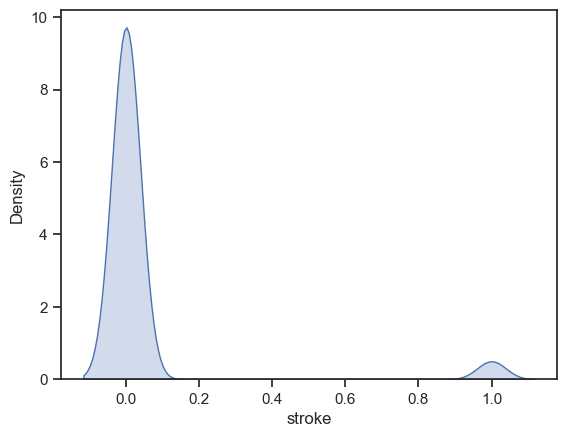

In [99]:
sns.kdeplot(data.stroke, shade = True)

### Missing Value Analysis

In [100]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [101]:
print(data.groupby("gender")["bmi"].mean())
print("\n")
print(data.groupby("hypertension")["bmi"].mean())
print("\n")
print(data.groupby("heart_disease")["bmi"].mean())
print("\n")
print(data.groupby("ever_married")["bmi"].mean())
print("\n")
print(data.groupby("work_type")["bmi"].mean())
print("\n")
print(data.groupby("residence_type")["bmi"].mean())
print("\n")
print(data.groupby("smoking_status")["bmi"].mean())
print("\n")
print(data.groupby("stroke")["bmi"].mean())
print("\n")

gender
0    28.644831
1    29.065758
Name: bmi, dtype: float64


hypertension
0    28.474069
1    33.036585
Name: bmi, dtype: float64


heart_disease
0    28.819117
1    30.316461
Name: bmi, dtype: float64


ever_married
0    25.214721
1    30.850749
Name: bmi, dtype: float64


work_type
Govt_job         30.522063
Never_worked     25.545455
Private          30.304625
Self-employed    30.211871
children         20.038003
Name: bmi, dtype: float64


residence_type
Rural    28.894212
Urban    28.892289
Name: bmi, dtype: float64


smoking_status
Unknown            25.666352
formerly smoked    30.747192
never smoked       29.982559
smokes             30.543555
Name: bmi, dtype: float64


stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64




In [102]:
data.groupby(["hypertension","ever_married","work_type","smoking_status"])["bmi"].mean()

hypertension  ever_married  work_type      smoking_status 
0             0             Govt_job       Unknown            29.085714
                                           formerly smoked    28.807143
                                           never smoked       29.306522
                                           smokes             30.622727
                            Never_worked   Unknown            22.037500
                                           never smoked       27.550000
                            Private        Unknown            27.710798
                                           formerly smoked    29.408642
                                           never smoked       27.717919
                                           smokes             28.657258
                            Self-employed  Unknown            28.648276
                                           formerly smoked    32.305263
                                           never smoked       29.347500
     

In [103]:
print(data.groupby("gender")["bmi"].median())
print("\n")
print(data.groupby("hypertension")["bmi"].median())
print("\n")
print(data.groupby("heart_disease")["bmi"].median())
print("\n")
print(data.groupby("ever_married")["bmi"].median())
print("\n")
print(data.groupby("work_type")["bmi"].median())
print("\n")
print(data.groupby("residence_type")["bmi"].median())
print("\n")
print(data.groupby("smoking_status")["bmi"].median())
print("\n")
print(data.groupby("stroke")["bmi"].median())
print("\n")

gender
0    28.4
1    27.8
Name: bmi, dtype: float64


hypertension
0    27.7
1    31.8
Name: bmi, dtype: float64


heart_disease
0    27.9
1    29.8
Name: bmi, dtype: float64


ever_married
0    23.5
1    29.6
Name: bmi, dtype: float64


work_type
Govt_job         29.40
Never_worked     23.15
Private          28.90
Self-employed    29.40
children         18.90
Name: bmi, dtype: float64


residence_type
Rural    28.1
Urban    28.0
Name: bmi, dtype: float64


smoking_status
Unknown            24.3
formerly smoked    29.8
never smoked       28.6
smokes             29.1
Name: bmi, dtype: float64


stroke
0    28.0
1    29.7
Name: bmi, dtype: float64




In [104]:
data.groupby(["hypertension","ever_married","work_type","smoking_status"])["bmi"].median()


hypertension  ever_married  work_type      smoking_status 
0             0             Govt_job       Unknown            27.90
                                           formerly smoked    27.70
                                           never smoked       27.40
                                           smokes             30.10
                            Never_worked   Unknown            21.15
                                           never smoked       25.85
                            Private        Unknown            25.80
                                           formerly smoked    27.80
                                           never smoked       26.45
                                           smokes             27.50
                            Self-employed  Unknown            29.40
                                           formerly smoked    31.90
                                           never smoked       29.15
                                           smokes        

In [105]:
# The NaN values within the 'bmi' feature were filled with the median value of the grouped categorical variables.
data["bmi"].fillna(data.groupby(["hypertension","ever_married","work_type","smoking_status"])["bmi"].transform("median"), inplace=True)
data[data.isnull().any(axis = 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Categorical Features Analysis

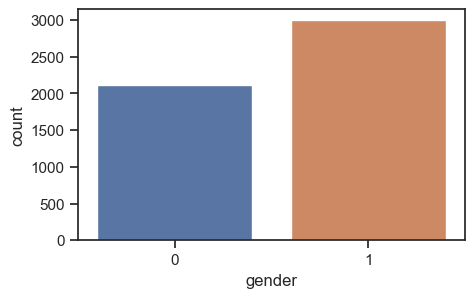

In [106]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.gender.value_counts().index, y = data.gender.value_counts(), data = data);
plt.show()

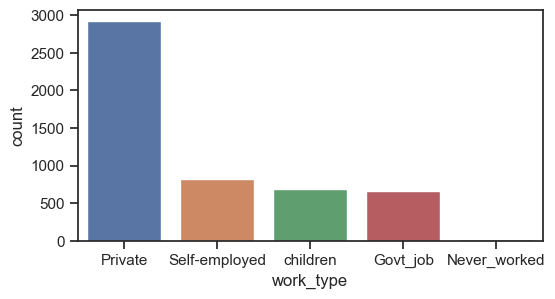

In [107]:
plt.figure(figsize=(6, 3))
sns.barplot(x = data.work_type.value_counts().index, y = data.work_type.value_counts(), data = data);

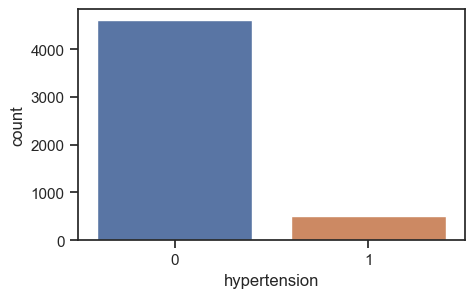

In [108]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.hypertension.value_counts().index, y = data.hypertension.value_counts(), data = data);

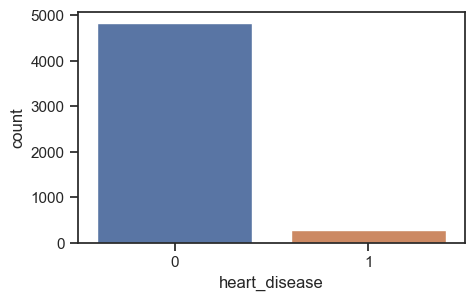

In [109]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.heart_disease.value_counts().index, y = data.heart_disease.value_counts(), data = data);
plt.show()

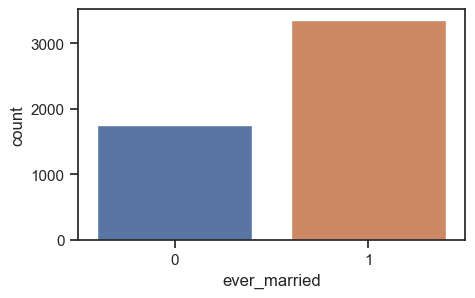

In [110]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.ever_married.value_counts().index, y = data.ever_married.value_counts(), data = data);
plt.show()

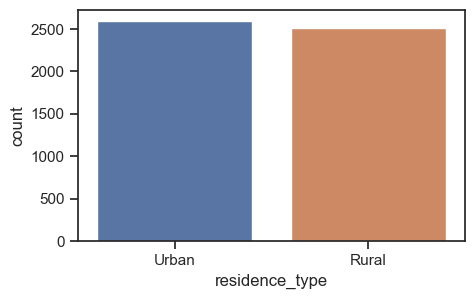

In [111]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.residence_type.value_counts().index, y = data.residence_type.value_counts(), data = data);
plt.show()

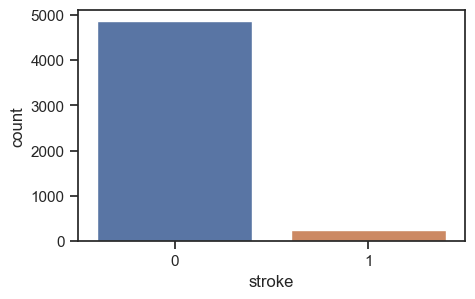

In [112]:
plt.figure(figsize=(5, 3))
sns.barplot(x = data.stroke.value_counts().index, y = data.stroke.value_counts(), data = data);
plt.show()

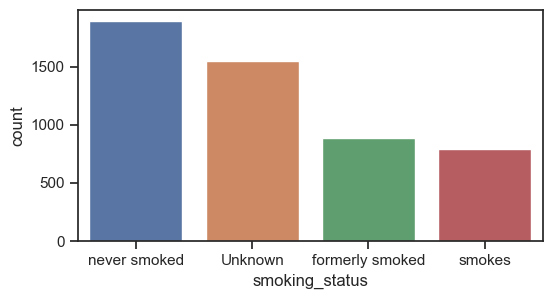

In [113]:
plt.figure(figsize=(6, 3))
sns.barplot(x = data.smoking_status.value_counts().index, y = data.smoking_status.value_counts(), data = data);
plt.show()

### Numerical Features Analysis

In [114]:
for each in numerical_name:
    print(each.upper() + "\n")
    print("Mean: " + str(data[each].mean()))
    print("Count: " + str(data[each].count()))
    print("Max value: " + str(data[each].max()))
    print("Min value: " + str(data[each].min()))
    print("Median: " + str(data[each].median()))
    print("Std: " + str(data[each].std()) + "\n")

AGE

Mean: 43.226614481409
Count: 5110
Max value: 82.0
Min value: 0.08
Median: 45.0
Std: 22.61264672311352

AVG_GLUCOSE_LEVEL

Mean: 106.1476771037182
Count: 5110
Max value: 271.74
Min value: 55.12
Median: 91.88499999999999
Std: 45.283560150582026

BMI

Mean: 28.888610567514675
Count: 5110
Max value: 97.6
Min value: 10.3
Median: 28.3
Std: 7.728161030763156



/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



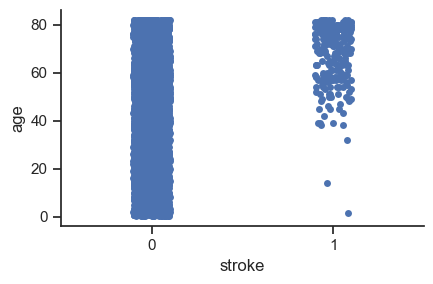

In [115]:
sns.catplot(data = data, x = "stroke", y = "age", height=3, aspect=1.5)
plt.show()

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



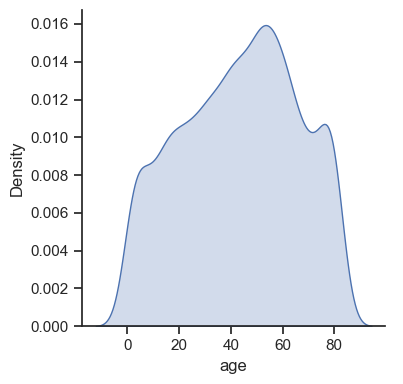

In [116]:
sns.FacetGrid(data, height = 4).map(sns.kdeplot, "age", shade = True).add_legend();


/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



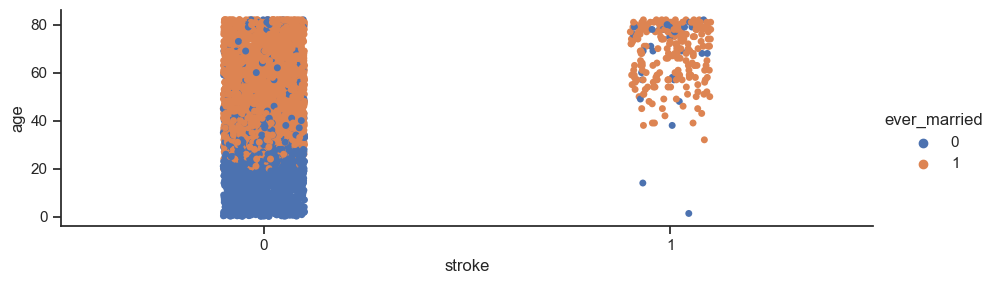

In [117]:
sns.catplot(data = data, x = "stroke", y = "age", hue = "ever_married", height=3, aspect=3)
plt.show()

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



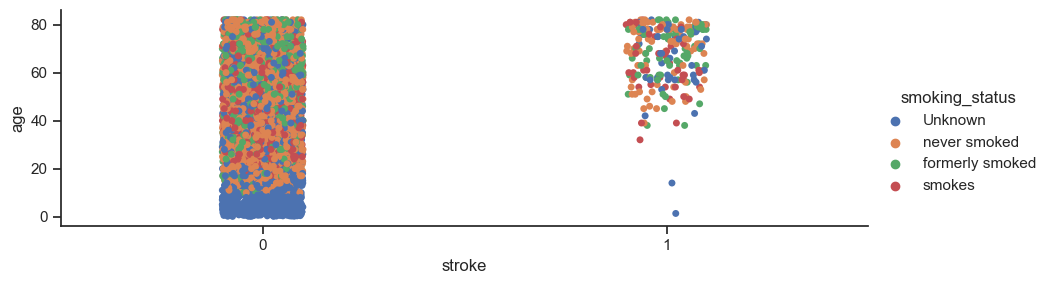

In [118]:
sns.catplot(data = data, x = "stroke", y = "age", hue = "smoking_status", height=3, aspect=3)
plt.show()

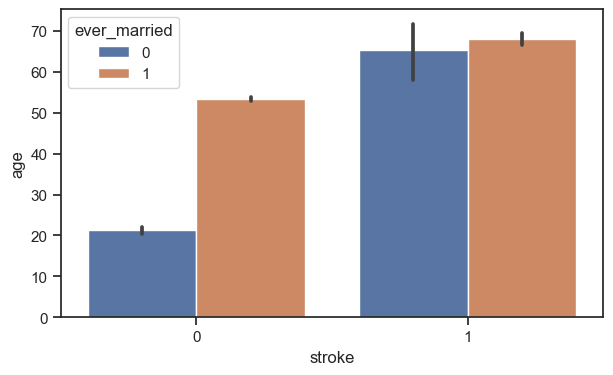

In [119]:
plt.figure(figsize=(7, 4))
sns.barplot(data = data, x = "stroke", y = "age", hue = "ever_married")
plt.show()

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



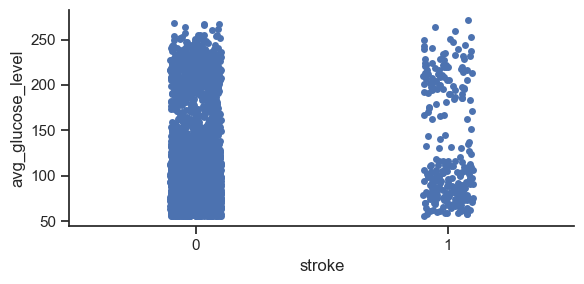

In [120]:
sns.catplot(data = data, x = "stroke", y = "avg_glucose_level", height=3, aspect=2)
plt.show()

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



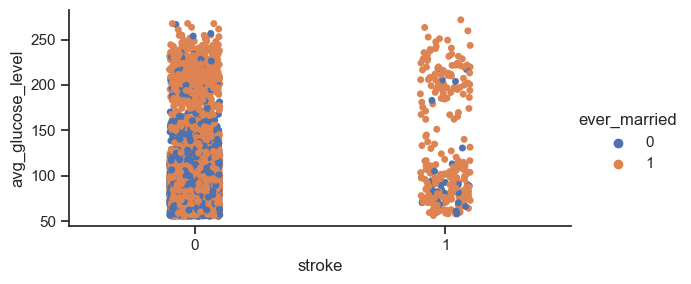

In [121]:
sns.catplot(data = data, x = "stroke", y = "avg_glucose_level", hue = "ever_married", height=3, aspect=2)
plt.show()

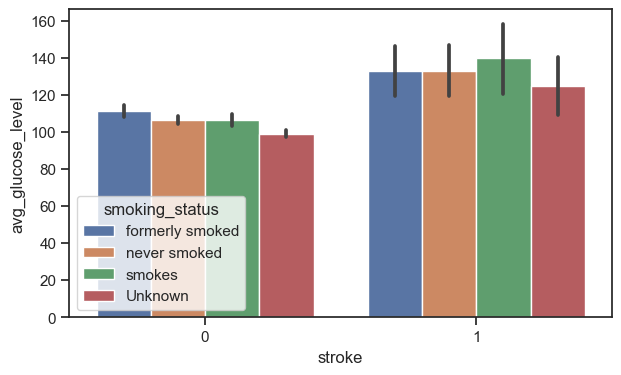

In [122]:
plt.figure(figsize=(7, 4))
sns.barplot(data = data, x = "stroke", y = "avg_glucose_level", hue = "smoking_status")
plt.show()

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



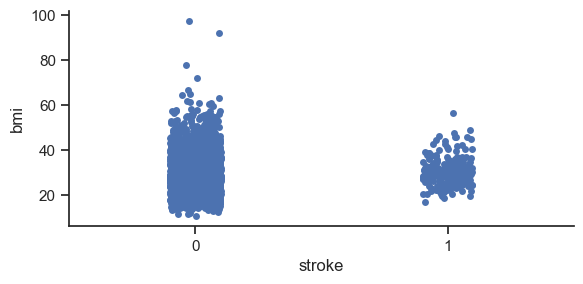

In [123]:
sns.catplot(data = data, x = "stroke", y = "bmi", height=3, aspect=2)
plt.show()

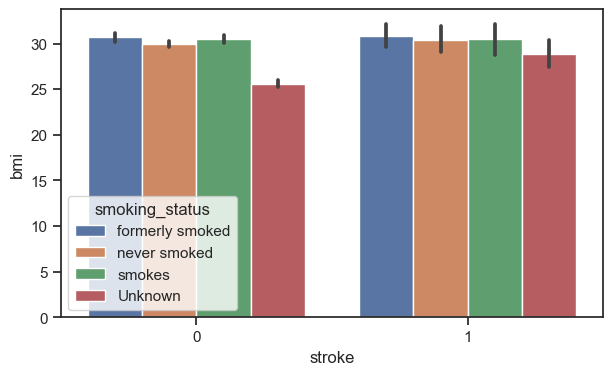

In [124]:
plt.figure(figsize=(7, 4))
sns.barplot(data = data, x = "stroke", y = "bmi", hue = "smoking_status")
plt.show()

In [125]:
data.groupby(["stroke", "smoking_status"])["avg_glucose_level"].mean()


stroke  smoking_status 
0       Unknown             98.810127
        formerly smoked    111.175092
        never smoked       106.292042
        smokes             106.219906
1       Unknown            124.808936
        formerly smoked    132.806857
        never smoked       132.907222
        smokes             139.987857
Name: avg_glucose_level, dtype: float64

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



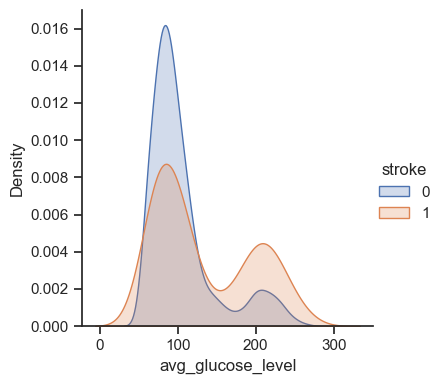

In [126]:
sns.FacetGrid(data, hue = "stroke", height = 4).map(sns.kdeplot, "avg_glucose_level", shade = True).add_legend();

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



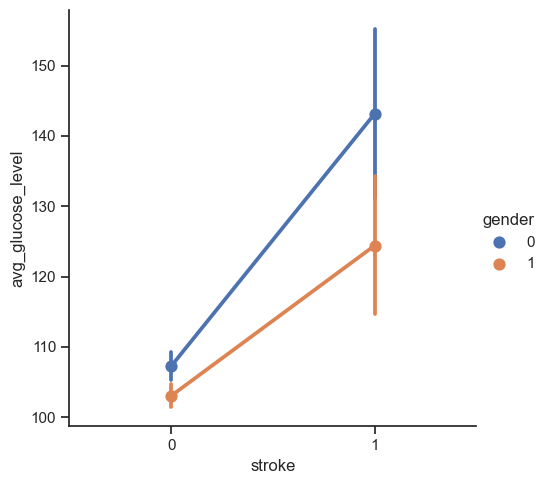

In [127]:
sns.catplot(x= "stroke", y="avg_glucose_level", hue="gender", data = data, kind = "point");

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



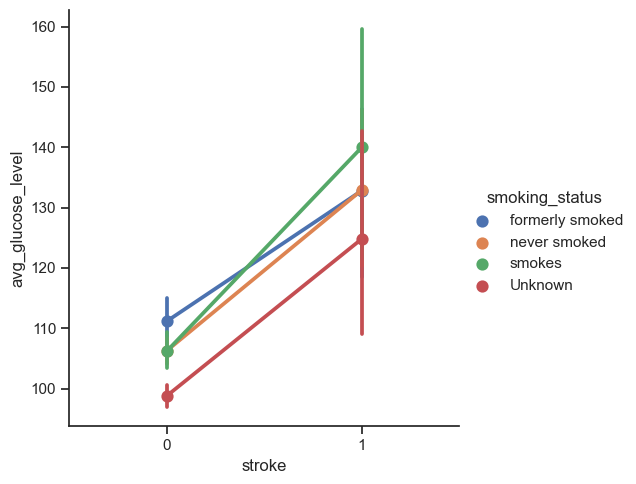

In [128]:
sns.catplot(x= "stroke", y="avg_glucose_level", hue="smoking_status", data = data, kind = "point");

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



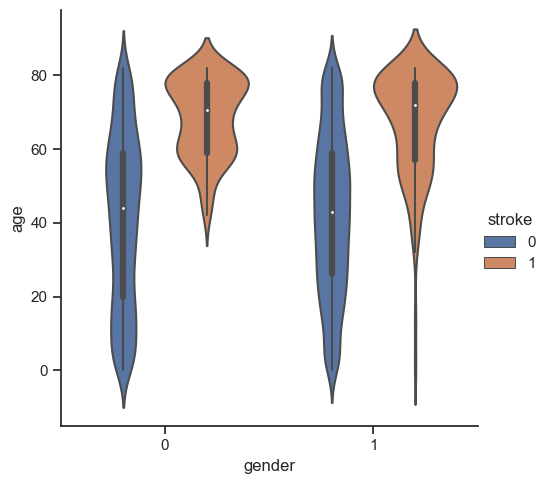

In [129]:
sns.catplot(x = "gender", y="age", hue="stroke",data = data, kind = "violin");

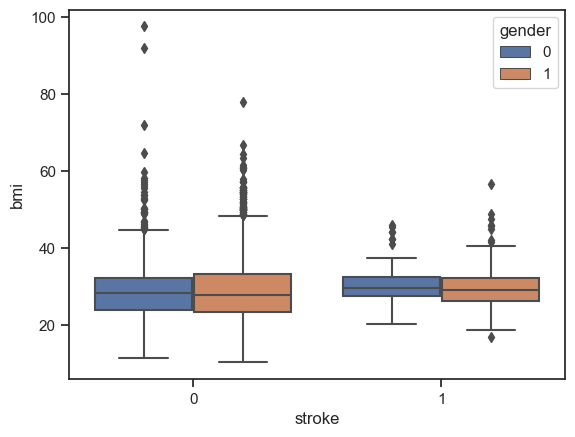

In [130]:
sns.boxplot(data = data, x = "stroke", y="bmi", hue="gender");

/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



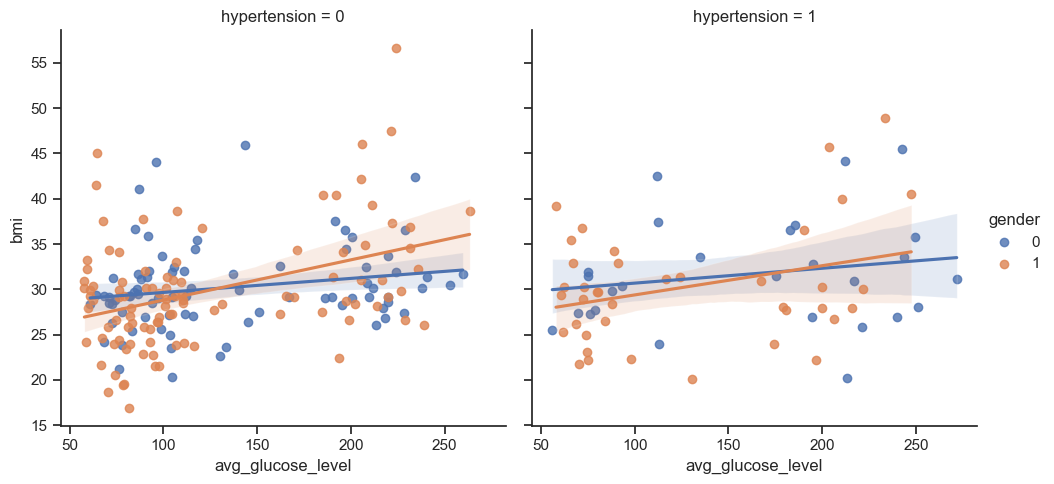

In [131]:
sns.lmplot(x = "avg_glucose_level", y = "bmi", hue = "gender", col = "hypertension", data = data[data["stroke"] == 1]);

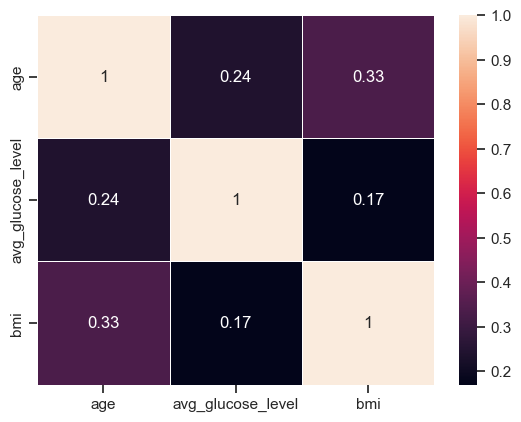

In [132]:
sns.heatmap(data[numerical_name].corr(), linewidths = .5, annot = True);


/Users/ayushibhatnagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



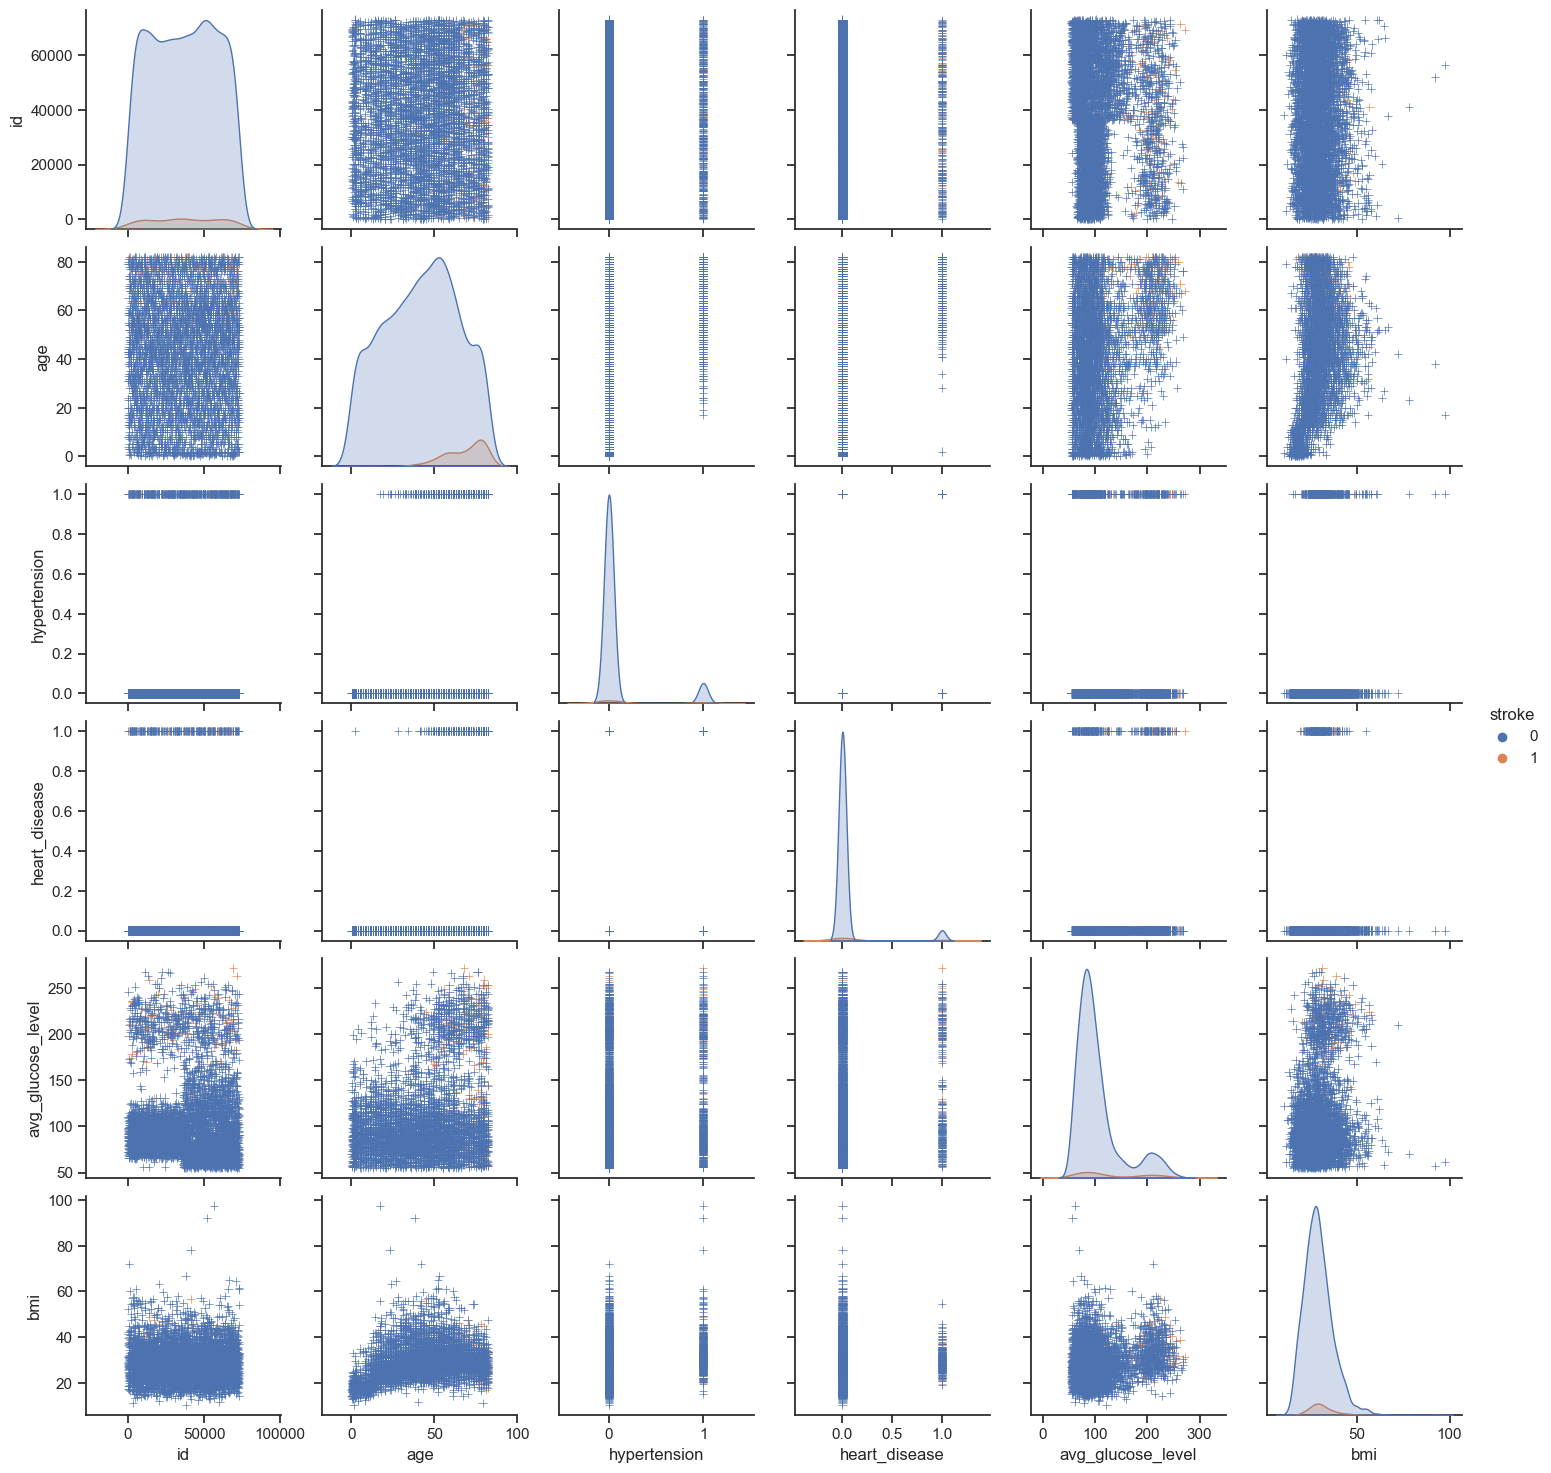

In [133]:
sns.pairplot(df, hue='stroke', diag_kind='kde', markers='+')
plt.show()

### Outlier Detection

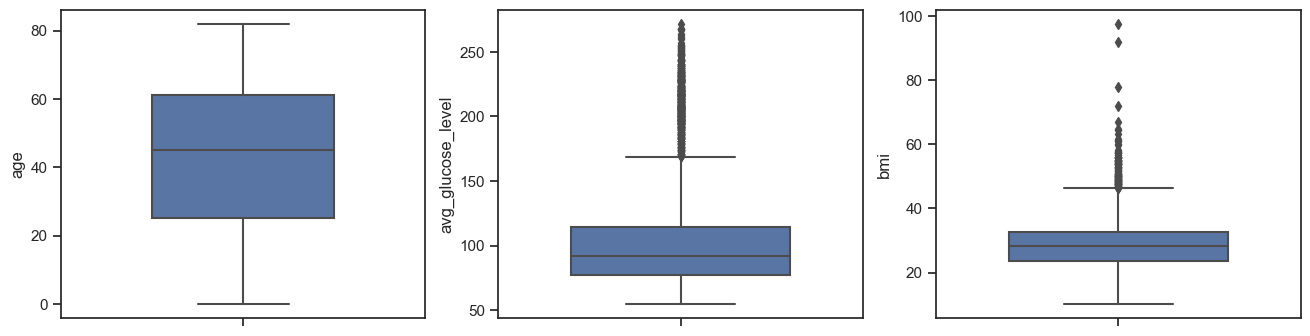

In [134]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='age', data=data, ax=plt.subplot(1, 3, 1), width=0.5)
sns.boxplot(y='avg_glucose_level', data=data, ax=plt.subplot(1, 3, 2), width=0.6)
sns.boxplot(y='bmi', data=data, ax=plt.subplot(1, 3, 3), width=0.6)
plt.show()

In [135]:
for featr in numerical_name:
    Q1 = data.loc[:, featr].quantile(0.25)
    Q3 = data.loc[:, featr].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    try:
        data.loc[data[featr] < lower_bound, featr] = lower_bound
    except:
        print("No outlier data.")
    try:
        data.loc[data[featr] > upper_bound, featr] = upper_bound
    except:
        print("No outlier data.")

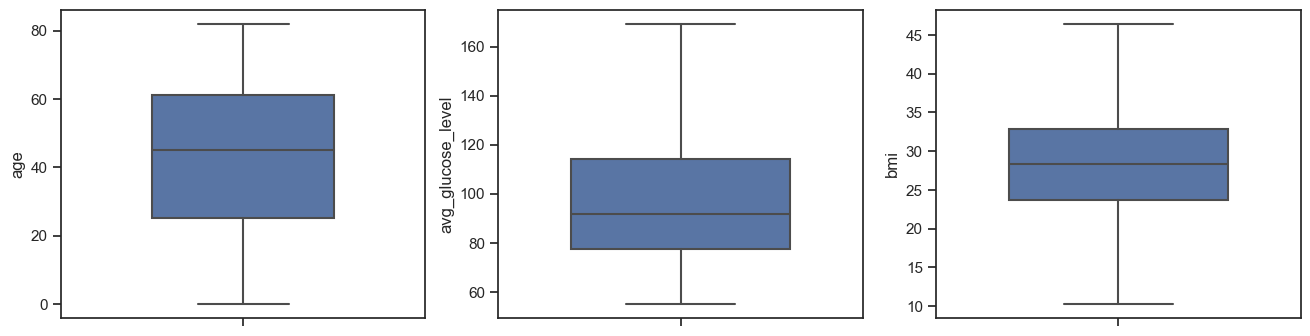

In [136]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='age', data=data, ax=plt.subplot(1, 3, 1), width=0.5)
sns.boxplot(y='avg_glucose_level', data=data, ax=plt.subplot(1, 3, 2), width=0.6)
sns.boxplot(y='bmi', data=data, ax=plt.subplot(1, 3, 3), width=0.6)
plt.show()

In [137]:
# Using an outlier detection algorithm that identifies anomalous points by leveraging density variations in the local neighborhood of each data point. LOF is useful in scenarios where clustering may not be effective in detecting local outliers.
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)
tmp_data = data.copy()
tmp_data = tmp_data[numerical_name]
tmp_data

,age,avg_glucose_level,bmi
0,67.0,169.3575,36.6
1,61.0,169.3575,28.4
2,80.0,105.9200,32.5
3,49.0,169.3575,34.4
4,79.0,169.3575,24.0
...,...,...,...
5105,80.0,83.7500,31.9
5106,81.0,125.2000,40.0
5107,35.0,82.9900,30.6
5108,51.0,166.2900,25.6


In [138]:
lof.fit_predict(tmp_data)

array([ 1,  1,  1, ...,  1, -1,  1])

In [139]:
tmp_data_scores = lof.negative_outlier_factor_
np.sort(tmp_data_scores)[0:30]

array([-2.96191113, -2.70464579, -2.69150359, -2.58855753, -2.38932643,
       -2.37413319, -2.26442058, -2.2356385 , -2.23497891, -2.22715586,
       -2.01010144, -2.00498435, -1.96696335, -1.95611726, -1.9012304 ,
       -1.88219513, -1.79791483, -1.76765322, -1.75728085, -1.7547069 ,
       -1.7496656 , -1.74192253, -1.71397817, -1.68160259, -1.66478558,
       -1.6616196 , -1.62190233, -1.61759945, -1.59820426, -1.59671502])

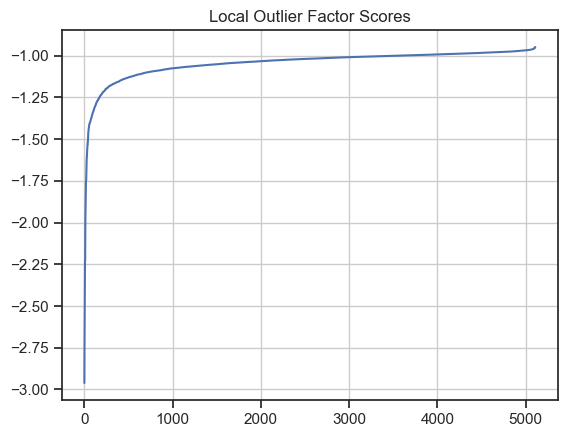

In [140]:
plt.plot(np.sort(tmp_data_scores))
plt.title('Local Outlier Factor Scores')
plt.grid(True)
plt.show()

In [141]:
trashold = np.sort(tmp_data_scores)[16]
# data[tmp_data_scores < trashold]
data = data[tmp_data_scores > trashold] # outliers deleted.

### Scaling Numeric Features

In [142]:
from sklearn import preprocessing 

data[numerical_name] = preprocessing.scale(data[numerical_name])

### Encoding Categorical Variables

In [143]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

- gender: Female=1 , Male=0

- ever_married: Yes=1 , No=0

- hypertension: Yes=1 , No=0

- heart_disease: Yes=1 , No=0

- stroke: Yes=1 , No=0

In [144]:
data = pd.get_dummies(data, columns = ["work_type", "residence_type", "smoking_status"], prefix = ["work", "residence", "smoking"])
data.replace({True: 1, False: 0}, inplace=True)

In [145]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,0,1.055020,0,1,1,2.067823,1.101792,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0.789308,0,0,1,2.067823,-0.045391,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1.630730,0,1,1,0.152228,0.528200,1,0,0,1,0,0,1,0,0,0,1,0


In [146]:
data.drop(["work_children", "residence_Urban", "smoking_smokes"], axis = 1, inplace = True) # dummy features cleaned.

In [147]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,residence_Rural,smoking_Unknown,smoking_formerly smoked,smoking_never smoked
0,0,1.055020,0,1,1,2.067823,1.101792,1,0,0,1,0,0,0,1,0
1,1,0.789308,0,0,1,2.067823,-0.045391,1,0,0,0,1,1,0,0,1
2,0,1.630730,0,1,1,0.152228,0.528200,1,0,0,1,0,1,0,0,1
